# Customer Churn Detection-AI Project
#Author: Devisha Arunadevi Tiwari

In [11]:
import pandas as pd
print(pd.__version__)


2.2.2


In [12]:
pip install --upgrade pandas


   ---------------------------------------- 11.6/11.6 MB 3.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.


In [21]:
import pandas as pd

# Task 1: Load the three CSV files
churn_data = pd.read_csv('churn_data.csv')
customer_data = pd.read_csv('customer_data.csv')
internet_data = pd.read_csv('internet_data.csv')

# Task 2: Merge the dataframes on the common column 'customerID'
# Assuming 'customerID' is the common column in all three datasets
merged_df = pd.merge(churn_data, customer_data, on='customerID', how='inner')
merged_df = pd.merge(merged_df, internet_data, on='customerID', how='inner')

# Task 3: Save the merged dataframe to a new CSV file
merged_df.to_csv('customer_churn.csv', index=False)

# Task 4: Display the first few rows of the merged CSV file
print("Displaying the first few rows of the merged customer_churn.csv file:")
print(merged_df.head())

# Task 5: Provide a link to download the merged CSV file
# In Jupyter, you can use HTML to create a download link.
from IPython.display import FileLink

# Create a download link for the CSV file
file_link = FileLink('customer_churn.csv')
file_link


Displaying the first few rows of the merged customer_churn.csv file:
   customerID  tenure PhoneService        Contract PaperlessBilling  \
0  7590-VHVEG       1           No  Month-to-month              Yes   
1  5575-GNVDE      34          Yes        One year               No   
2  3668-QPYBK       2          Yes  Month-to-month              Yes   
3  7795-CFOCW      45           No        One year               No   
4  9237-HQITU       2          Yes  Month-to-month              Yes   

               PaymentMethod  MonthlyCharges TotalCharges Churn  gender  ...  \
0           Electronic check           29.85        29.85    No  Female  ...   
1               Mailed check           56.95       1889.5    No    Male  ...   
2               Mailed check           53.85       108.15   Yes    Male  ...   
3  Bank transfer (automatic)           42.30      1840.75    No    Male  ...   
4           Electronic check           70.70       151.65   Yes  Female  ...   

   Partner Dependents  

C:\Users\91983\customer_churn.csv

Total number of male customers: 3555
Total number of customers with DSL internet service: 2421
Extracted Female senior citizens with Mailed Check Payment Method:
Extracted customers with tenure < 10 or TotalCharges < 500:


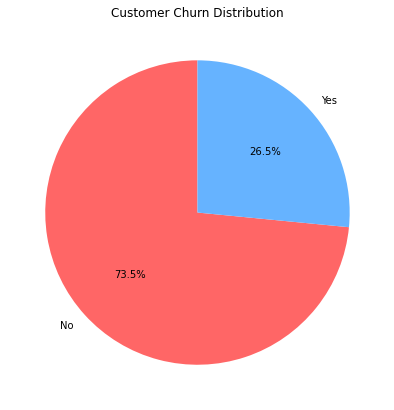

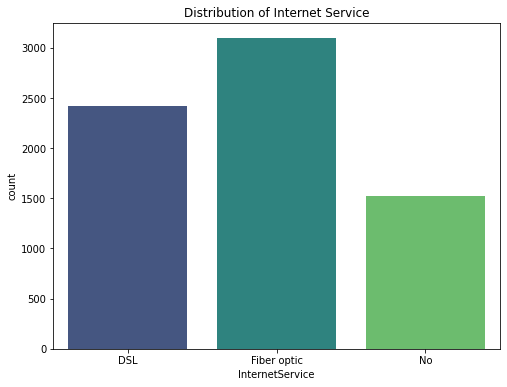

Epoch 1/150
564/564 [==============================] - 2s 2ms/step - loss: 1.4880 - accuracy: 0.0405 - val_loss: 0.9928 - val_accuracy: 0.0000e+00
Epoch 2/150
564/564 [==============================] - 1s 2ms/step - loss: 0.9749 - accuracy: 0.1793 - val_loss: 0.9504 - val_accuracy: 0.0625
Epoch 3/150
564/564 [==============================] - 1s 2ms/step - loss: 0.9674 - accuracy: 0.1182 - val_loss: 0.9487 - val_accuracy: 0.0532
Epoch 4/150
564/564 [==============================] - 1s 2ms/step - loss: 0.9655 - accuracy: 0.0815 - val_loss: 0.9472 - val_accuracy: 0.0497
Epoch 5/150
564/564 [==============================] - 1s 2ms/step - loss: 0.9643 - accuracy: 0.0515 - val_loss: 0.9467 - val_accuracy: 0.0227
Epoch 6/150
564/564 [==============================] - 1s 2ms/step - loss: 0.9631 - accuracy: 0.0488 - val_loss: 0.9459 - val_accuracy: 0.0987
Epoch 7/150
564/564 [==============================] - 1s 2ms/step - loss: 0.9621 - accuracy: 0.0282 - val_loss: 0.9458 - val_accuracy: 0.

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [26]:
# Task 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

# Task 2: Load the dataset
# Method: Load the 'customer_churn' dataset into a pandas dataframe
df = pd.read_csv('customer_churn.csv')

# Task 3: Check the first few rows of the data
# Method: Display the first few rows of the dataset to understand the structure
df.head()

### A) Data Manipulation:

# Task A1: Find the total number of male customers
# Method: Filter by 'gender' column and count male customers
male_customers = df[df['gender'] == 'Male'].shape[0]
print(f'Total number of male customers: {male_customers}')

# Task A2: Find the total number of customers whose Internet Service is ‘DSL’
# Method: Filter the rows where 'InternetService' column is 'DSL' and count them
dsl_customers = df[df['InternetService'] == 'DSL'].shape[0]
print(f'Total number of customers with DSL internet service: {dsl_customers}')

# Task A3: Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’
# Method: Filter by 'gender', 'SeniorCitizen', and 'PaymentMethod' columns to extract relevant data
new_customer_female_senior = df[(df['gender'] == 'Female') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Mailed check')]
print('Extracted Female senior citizens with Mailed Check Payment Method:')
new_customer_female_senior.head()

# Task A4: Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’
# Method: Filter rows where 'tenure' < 10 or 'TotalCharges' < 500

# First, convert the 'TotalCharges' column to numeric, forcing errors to NaN (invalid values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now filter the rows where 'tenure' < 10 or 'TotalCharges' < 500
new_customer = df[(df['tenure'] < 10) | (df['TotalCharges'] < 500)]

# Display the extracted data
print('Extracted customers with tenure < 10 or TotalCharges < 500:')
new_customer.head()


### B) Data Visualization:

# Task B1: Build a pie-chart to show the distribution of customers who would be churning out
# Method: Use a pie chart to visualize churn distribution
churn_count = df['Churn'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(churn_count, labels=churn_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff6666','#66b3ff'])
plt.title('Customer Churn Distribution')
plt.show()

# Task B2: Build a bar-plot to show the distribution of ‘Internet Service’
# Method: Use a bar plot to show the distribution of 'InternetService' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='InternetService', palette='viridis')
plt.title('Distribution of Internet Service')
plt.show()

### C) Model Building:

# Task C1: Build a sequential model using Keras, to find out if the customer would churn or not, using 'tenure' as the feature and 'Churn' as the dependent/target column:

# Prepare the data for model 1
# Method: Select 'tenure' as the feature and 'Churn' as the target variable
X = df[['tenure']].values
y = df['Churn'].map({'Yes': 1, 'No': 0}).values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model1 = Sequential()
model1.add(Dense(12, input_dim=1, activation='relu'))  # Input layer with 12 nodes
model1.add(Dense(8, activation='relu'))  # Hidden layer with 8 nodes
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history1 = model1.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test))

# Predict on the test set and build a confusion matrix
y_pred1 = model1.predict(X_test)
y_pred1 = (y_pred1 > 0.5)
cm1 = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix for Model 1:')
print(cm1)

# Plot Accuracy vs Epochs graph for Model 1
plt.plot(history1.history['accuracy'], label='Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1: Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Task C2: Build the 2nd model using the same target and feature variables:
# i. Add a drop-out layer after the input layer with drop-out value of 0.3
# ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2

# Build the model with dropout layers
model2 = Sequential()
model2.add(Dense(12, input_dim=1, activation='relu'))  # Input layer
model2.add(Dropout(0.3))  # Dropout layer with dropout rate of 0.3
model2.add(Dense(8, activation='relu'))  # Hidden layer
model2.add(Dropout(0.2))  # Dropout layer with dropout rate of 0.2
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test))

# Predict on the test set and build a confusion matrix
y_pred2 = model2.predict(X_test)
y_pred2 = (y_pred2 > 0.5)
cm2 = confusion_matrix(y_test, y_pred2)
print('Confusion Matrix for Model 2:')
print(cm2)

# Plot Accuracy vs Epochs graph for Model 2
plt.plot(history2.history['accuracy'], label='Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2: Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Task C3: Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:

# Prepare the data for Model 3
# Method: Select 'Tenure', 'MonthlyCharges', and 'TotalCharges' as features and 'Churn' as target
X3 = df[['tenure', 'MonthlyCharges', 'TotalCharges']].values
y3 = df['Churn'].map({'Yes': 1, 'No': 0}).values

# Split the data into train and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Normalize the features
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.transform(X3_test)

# Build the model
model3 = Sequential()
model3.add(Dense(12, input_dim=3, activation='relu'))  # Input layer
model3.add(Dense(8, activation='relu'))  # Hidden layer
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history3 = model3.fit(X3_train, y3_train, epochs=150, batch_size=10, validation_data=(X3_test, y3_test))

# Predict on the test set and build a confusion matrix
y_pred3 = model3.predict(X3_test)
y_pred3 = (y_pred3 > 0.5)
cm3 = confusion_matrix(y3_test, y_pred3)
print('Confusion Matrix for Model 3:')
print(cm3)

# Predict on the test set and build a confusion matrix
y_pred1 = model1.predict(X_test)
y_pred1 = (y_pred1 > 0.5).astype(int)  # Convert probabilities to binary labels

# Confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)

# Print confusion matrix
print('Confusion Matrix for Model 1:')
print(cm1)

# Plot Accuracy vs Epochs graph
plt.plot(history1.history['accuracy'], label='Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1: Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Plot Accuracy vs Epochs graph for Model 3
plt.plot(history3.history['accuracy'], label='Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3: Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Task Complete


In [27]:
# Check y_test (target) format to ensure it's binary (0 and 1)
print(f"y_test unique values: {np.unique(y_test)}")

# Ensure y_test is binary (0 and 1)
y_test = y_test.astype(int)

# Now, let's work with y_pred1 (predictions)
y_pred1 = model1.predict(X_test)

# Ensure predictions are binary (0 and 1) by applying threshold of 0.5
y_pred1 = (y_pred1 > 0.5).astype(int)

# Check the unique values in y_pred1 after thresholding
print(f"y_pred1 unique values after thresholding: {np.unique(y_pred1)}")

# Now that both y_test and y_pred1 are binary, we can compute the confusion matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred1)

# Print confusion matrix
print('Confusion Matrix for Model 1:')
print(cm1)


y_test unique values: [0 1]
45/45 [==============================] - 0s 688us/step
y_pred1 unique values after thresholding: [0 1]


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

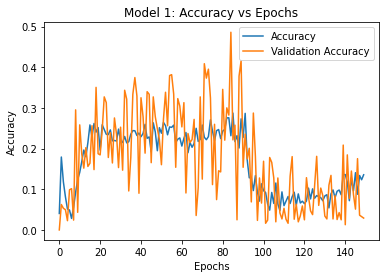

In [28]:
# Plot Accuracy vs Epochs graph for Model 1
plt.plot(history1.history['accuracy'], label='Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1: Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Total number of male customers: 3555
Total number of customers with DSL internet service: 2421
Extracted Female senior citizens with Mailed Check Payment Method:
Extracted customers with tenure < 10 or TotalCharges < 500:


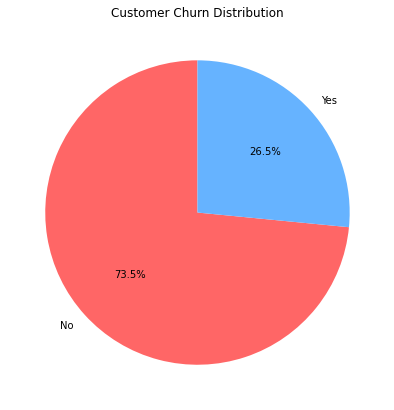

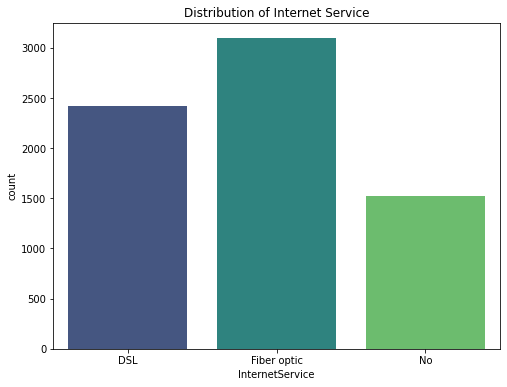

Epoch 1/150
564/564 [==============================] - 4s 5ms/step - loss: 0.5447 - accuracy: 0.7345 - val_loss: 0.5073 - val_accuracy: 0.7353
Epoch 2/150
564/564 [==============================] - 1s 2ms/step - loss: 0.5195 - accuracy: 0.7345 - val_loss: 0.5029 - val_accuracy: 0.7353
Epoch 3/150
564/564 [==============================] - 1s 1ms/step - loss: 0.5163 - accuracy: 0.7345 - val_loss: 0.4992 - val_accuracy: 0.7353
Epoch 4/150
564/564 [==============================] - 1s 2ms/step - loss: 0.5143 - accuracy: 0.7345 - val_loss: 0.4983 - val_accuracy: 0.7353
Epoch 5/150
564/564 [==============================] - 1s 2ms/step - loss: 0.5134 - accuracy: 0.7345 - val_loss: 0.5013 - val_accuracy: 0.7353
Epoch 6/150
564/564 [==============================] - 1s 2ms/step - loss: 0.5133 - accuracy: 0.7345 - val_loss: 0.5006 - val_accuracy: 0.7353
Epoch 7/150
564/564 [==============================] - 1s 2ms/step - loss: 0.5129 - accuracy: 0.7345 - val_loss: 0.4975 - val_accuracy: 0.7353

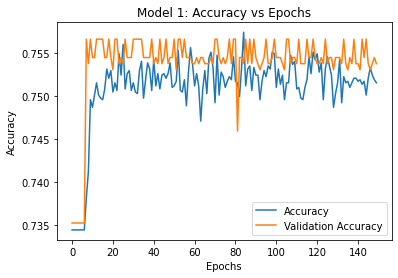

Epoch 1/150
564/564 [==============================] - 3s 2ms/step - loss: 0.6337 - accuracy: 0.6967 - val_loss: 0.5519 - val_accuracy: 0.7353
Epoch 2/150
564/564 [==============================] - 1s 3ms/step - loss: 0.5390 - accuracy: 0.7375 - val_loss: 0.5022 - val_accuracy: 0.7353
Epoch 3/150
564/564 [==============================] - 1s 2ms/step - loss: 0.5298 - accuracy: 0.7382 - val_loss: 0.5011 - val_accuracy: 0.7353
Epoch 4/150
564/564 [==============================] - 1s 2ms/step - loss: 0.5260 - accuracy: 0.7398 - val_loss: 0.4999 - val_accuracy: 0.7353
Epoch 5/150
564/564 [==============================] - 1s 2ms/step - loss: 0.5288 - accuracy: 0.7416 - val_loss: 0.5006 - val_accuracy: 0.7353
Epoch 6/150
564/564 [==============================] - 1s 3ms/step - loss: 0.5227 - accuracy: 0.7417 - val_loss: 0.5003 - val_accuracy: 0.7353
Epoch 7/150
564/564 [==============================] - 1s 2ms/step - loss: 0.5191 - accuracy: 0.7396 - val_loss: 0.4977 - val_accuracy: 0.7346

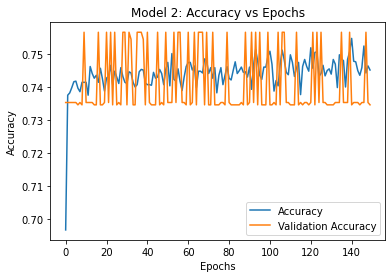

Epoch 1/150
564/564 [==============================] - 2s 2ms/step - loss: nan - accuracy: 0.7290 - val_loss: nan - val_accuracy: 0.7353
Epoch 2/150
564/564 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.7345 - val_loss: nan - val_accuracy: 0.7353
Epoch 3/150
564/564 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.7345 - val_loss: nan - val_accuracy: 0.7353
Epoch 4/150
564/564 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.7345 - val_loss: nan - val_accuracy: 0.7353
Epoch 5/150
564/564 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.7345 - val_loss: nan - val_accuracy: 0.7353
Epoch 6/150
564/564 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.7345 - val_loss: nan - val_accuracy: 0.7353
Epoch 7/150
564/564 [==============================] - 1s 2ms/step - loss: nan - accuracy: 0.7345 - val_loss: nan - val_accuracy: 0.7353
Epoch 8/150
564/564 [====================

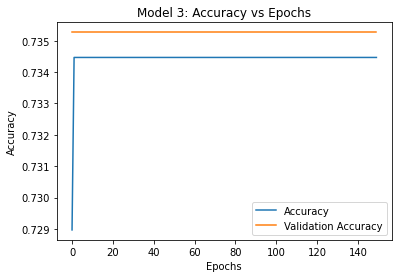

In [31]:
# Task 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix

# Task 2: Load the dataset
# Method: Load the 'customer_churn' dataset into a pandas dataframe
df = pd.read_csv('customer_churn.csv')

# Task 3: Check the first few rows of the data
# Method: Display the first few rows of the dataset to understand the structure
df.head()

### A) Data Manipulation:

# Task A1: Find the total number of male customers
# Method: Filter by 'gender' column and count male customers
male_customers = df[df['gender'] == 'Male'].shape[0]
print(f'Total number of male customers: {male_customers}')

# Task A2: Find the total number of customers whose Internet Service is ‘DSL’
# Method: Filter the rows where 'InternetService' column is 'DSL' and count them
dsl_customers = df[df['InternetService'] == 'DSL'].shape[0]
print(f'Total number of customers with DSL internet service: {dsl_customers}')

# Task A3: Extract all the Female senior citizens whose Payment Method is Mailed check & store the result in ‘new_customer’
# Method: Filter by 'gender', 'SeniorCitizen', and 'PaymentMethod' columns to extract relevant data
new_customer_female_senior = df[(df['gender'] == 'Female') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Mailed check')]
print('Extracted Female senior citizens with Mailed Check Payment Method:')
new_customer_female_senior.head()

# Task A4: Extract all those customers whose tenure is less than 10 months or their Total charges is less than 500$ & store the result in ‘new_customer’
# Method: Filter rows where 'tenure' < 10 or 'TotalCharges' < 500

# First, convert the 'TotalCharges' column to numeric, forcing errors to NaN (invalid values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Now filter the rows where 'tenure' < 10 or 'TotalCharges' < 500
new_customer = df[(df['tenure'] < 10) | (df['TotalCharges'] < 500)]

# Display the extracted data
print('Extracted customers with tenure < 10 or TotalCharges < 500:')
new_customer.head()


### B) Data Visualization:

# Task B1: Build a pie-chart to show the distribution of customers who would be churning out
# Method: Use a pie chart to visualize churn distribution
churn_count = df['Churn'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(churn_count, labels=churn_count.index, autopct='%1.1f%%', startangle=90, colors=['#ff6666','#66b3ff'])
plt.title('Customer Churn Distribution')
plt.show()

# Task B2: Build a bar-plot to show the distribution of ‘Internet Service’
# Method: Use a bar plot to show the distribution of 'InternetService' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='InternetService', palette='viridis')
plt.title('Distribution of Internet Service')
plt.show()

### C) Model Building:

# Task C1: Build a sequential model using Keras, to find out if the customer would churn or not, using 'tenure' as the feature and 'Churn' as the dependent/target column:

# Prepare the data for model 1
# Method: Select 'tenure' as the feature and 'Churn' as the target variable
X = df[['tenure']].values
y = df['Churn'].map({'Yes': 1, 'No': 0}).values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model1 = Sequential()
model1.add(Dense(12, input_dim=1, activation='relu'))  # Input layer with 12 nodes
model1.add(Dense(8, activation='relu'))  # Hidden layer with 8 nodes
model1.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history1 = model1.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test))

# Predict on the test set and build a confusion matrix
y_pred1 = model1.predict(X_test)
y_pred1 = (y_pred1 > 0.5).astype(int)  # Convert probabilities to binary labels
cm1 = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix for Model 1:')
print(cm1)

# Plot Accuracy vs Epochs graph for Model 1
plt.plot(history1.history['accuracy'], label='Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 1: Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Task C2: Build the 2nd model using the same target and feature variables:
# i. Add a drop-out layer after the input layer with drop-out value of 0.3
# ii. Add a drop-out layer after the hidden layer with drop-out value of 0.2

# Build the model with dropout layers
model2 = Sequential()
model2.add(Dense(12, input_dim=1, activation='relu'))  # Input layer
model2.add(Dropout(0.3))  # Dropout layer with dropout rate of 0.3
model2.add(Dense(8, activation='relu'))  # Hidden layer
model2.add(Dropout(0.2))  # Dropout layer with dropout rate of 0.2
model2.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train, y_train, epochs=150, batch_size=10, validation_data=(X_test, y_test))

# Predict on the test set and build a confusion matrix
y_pred2 = model2.predict(X_test)
y_pred2 = (y_pred2 > 0.5).astype(int)  # Convert probabilities to binary labels
cm2 = confusion_matrix(y_test, y_pred2)
print('Confusion Matrix for Model 2:')
print(cm2)

# Plot Accuracy vs Epochs graph for Model 2
plt.plot(history2.history['accuracy'], label='Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2: Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Task C3: Build the 3rd model using ‘Tenure’, ’Monthly Charges’ & ‘Total Charges’ as the features and ‘Churn’ as the dependent/target column:

# Prepare the data for Model 3
# Method: Select 'Tenure', 'MonthlyCharges', and 'TotalCharges' as features and 'Churn' as target
X3 = df[['tenure', 'MonthlyCharges', 'TotalCharges']].values
y3 = df['Churn'].map({'Yes': 1, 'No': 0}).values

# Split the data into train and test sets
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Normalize the features
X3_train = scaler.fit_transform(X3_train)
X3_test = scaler.transform(X3_test)

# Build the model
model3 = Sequential()
model3.add(Dense(12, input_dim=3, activation='relu'))  # Input layer
model3.add(Dense(8, activation='relu'))  # Hidden layer
model3.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history3 = model3.fit(X3_train, y3_train, epochs=150, batch_size=10, validation_data=(X3_test, y3_test))

# Predict on the test set and build a confusion matrix
y_pred3 = model3.predict(X3_test)
y_pred3 = (y_pred3 > 0.5).astype(int)  # Convert probabilities to binary labels
cm3 = confusion_matrix(y3_test, y_pred3)
print('Confusion Matrix for Model 3:')
print(cm3)

# Plot Accuracy vs Epochs graph for Model 3
plt.plot(history3.history['accuracy'], label='Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3: Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Task Complete
